# Knowing MLPs

## Please read the following before moving on

Welcome to the world of Multilayer Perceptrons (MLP)! We already know that MLPs are feedforward neural networks consisting of multiple layers of nodes or neurons. These networks are well-suited for a wide range of classification and regression tasks, thanks to their ability to learn complex, non-linear relationships between inputs and outputs.

In this Notebook, we will be working with the MNIST dataset to explore the importance of different MLP components. The MNIST dataset consists of 70,000 handwritten digit images, each of which is 28x28 pixels in size. Our goal is to use an MLP to classify these images into one of 10 categories (0-9).

To improve the performance of our MLP, we will experiment with various techniques such as Dropout, Batch Normalization, Loss Functions, Stochastic batch and mini-batch gradient descent, and more. Please note, we are using mini-batch unless explicity specified.

In addition, we will experiment with different optimization algorithms such as stochastic gradient descent, Adam, and RMSprop to find the optimal weights and biases for our MLP. We will use stochastic batch and mini-batch gradient descent, which involve updating the weights and biases of the network based on a small batch of randomly sampled training examples, to speed up the training process and reduce memory usage.

By the end of these experiments, we will have gained a deeper understanding of the various components that make up an MLP and their importance in achieving high performance in classification tasks. We will have gained hands-on experience in experimenting with these components and learned how to fine-tune an MLP to achieve the best possible performance on the MNIST dataset. So, let's get started!

### Step zero: Import Libraries

In [10]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
%matplotlib inline

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn
from tqdm import tqdm
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

### Step one: Using a PyTorch Dataset
Load MNIST dataset from `torchvision.datasets`

In [2]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
            ])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform) #TODO use datasets.MNIST
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)#TODO

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
validation_split = 0.2
dataset_size = len(trainset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)

In [4]:
train_loader_mini_batch = torch.utils.data.DataLoader(trainset, batch_size=64, sampler=train_sampler)
val_loader_mini_batch = torch.utils.data.DataLoader(trainset, batch_size=64, sampler=val_sampler)
# trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=64
#                                                     , shuffle=True, num_workers=2)
trainloader_stochastic = torch.utils.data.DataLoader(trainset, batch_size=1
                                                     , shuffle=True, num_workers=2)

#testloader = #TODO
testloader_minibatch = torch.utils.data.DataLoader(testset, batch_size=64
                                                    , shuffle=True, num_workers=2)
testloader_stochastic = torch.utils.data.DataLoader(testset, batch_size=1
                                                     , shuffle=True, num_workers=2)

### Step two: Define a MLP Model and without any bells and whitsles...
... along with a CrossEntropy loss criterion 

Do not use Dropout, BN or any other thing. Use ReLU for hidden layers.

⚠️ Do not use SoftMax in the output as nn.CrossEntropyLoss combines SoftMax and NLLLoss.

In [14]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )
        # code here
    def forward(self,x):
        # code here
        x = self.flatten(x)
        output = self.linear_relu_stack(x)
        return output

### Step three: Define the following optimizers using nn.optim
1. SGD
2. SGD with momentum
3. SGD with L2 regularization
4. RMSprop
5. Adam

In [6]:
# code here
learning_rate = 0.003
l2_regularization_value=0.001

model = SimpleMLP()
optimizers={
    'SGD':torch.optim.SGD(model.parameters(), lr=learning_rate),
    'SGD_Momentum':torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9),
    'SGD-L2':torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=l2_regularization_value),
    'RMS-PROP': torch.optim.RMSprop(model.parameters(), lr=learning_rate),
    'ADAM':torch.optim.Adam(model.parameters(), lr=learning_rate)
}

In [12]:
def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for data, target in dataloader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            y_true.extend(target.numpy())
            y_pred.extend(predicted.numpy())

    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    return accuracy, f1, precision, recall

==================== SGD ====================
Epoch 0 - Training loss: 2.2585527852376304
Epoch 0 - Validation loss: 2.2009523460205567
Epoch 1 - Training loss: 2.0670763324101764
Epoch 1 - Validation loss: 1.8787189011878156
Epoch 2 - Training loss: 1.5557452478408813
Epoch 2 - Validation loss: 1.2296206431185945
Epoch 3 - Training loss: 0.9833197420438131
Epoch 3 - Validation loss: 0.8148848864626377
Epoch 4 - Training loss: 0.7063834397395452
Epoch 4 - Validation loss: 0.6377325668296916
Epoch 5 - Training loss: 0.5768248474200567
Epoch 5 - Validation loss: 0.5437658132707819
Epoch 6 - Training loss: 0.5026313693920771
Epoch 6 - Validation loss: 0.4876960753760439
Epoch 7 - Training loss: 0.4552577604850133
Epoch 7 - Validation loss: 0.45016802997982247
Epoch 8 - Training loss: 0.4222867389321327
Epoch 8 - Validation loss: 0.4232434735019156
Epoch 9 - Training loss: 0.3983426023523013
Epoch 9 - Validation loss: 0.40169008876732054
Test loss: 9
SGD Model Accuracy = 0.8961


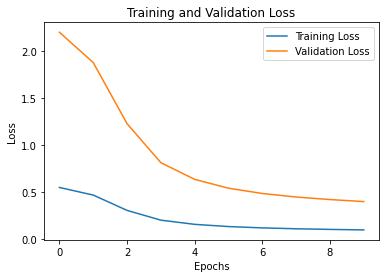

==================== SGD_Momentum ====================
Epoch 0 - Training loss: 1.0535593110720316
Epoch 0 - Validation loss: 0.42491458570386503
Epoch 1 - Training loss: 0.3518138987421989
Epoch 1 - Validation loss: 0.318735031688467
Epoch 2 - Training loss: 0.28722620503107704
Epoch 2 - Validation loss: 0.27766464274138847
Epoch 3 - Training loss: 0.24713935484488805
Epoch 3 - Validation loss: 0.24296893425127294
Epoch 4 - Training loss: 0.2152307902177175
Epoch 4 - Validation loss: 0.2154246862541805
Epoch 5 - Training loss: 0.18780070201804241
Epoch 5 - Validation loss: 0.19368770102316396
Epoch 6 - Training loss: 0.16661048091451328
Epoch 6 - Validation loss: 0.17492836793052388
Epoch 7 - Training loss: 0.14919472714761892
Epoch 7 - Validation loss: 0.1581103546307125
Epoch 8 - Training loss: 0.13305060711999733
Epoch 8 - Validation loss: 0.15051685127013542
Epoch 9 - Training loss: 0.1193416958451271
Epoch 9 - Validation loss: 0.1380447250533294
Test loss: 9
SGD_Momentum Model Ac

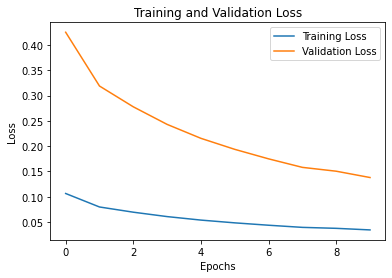

==================== SGD-L2 ====================
Epoch 0 - Training loss: 2.2622746028900145
Epoch 0 - Validation loss: 2.2090606068042997
Epoch 1 - Training loss: 2.0872955708503724
Epoch 1 - Validation loss: 1.9160828958166407
Epoch 2 - Training loss: 1.6182635820706686
Epoch 2 - Validation loss: 1.3020632292361969
Epoch 3 - Training loss: 1.0328047025998432
Epoch 3 - Validation loss: 0.8342949526107057
Epoch 4 - Training loss: 0.7134760733445485
Epoch 4 - Validation loss: 0.6352871994071818
Epoch 5 - Training loss: 0.574088620742162
Epoch 5 - Validation loss: 0.5407666435584109
Epoch 6 - Training loss: 0.5016794043382009
Epoch 6 - Validation loss: 0.48798207780148123
Epoch 7 - Training loss: 0.45792615054051083
Epoch 7 - Validation loss: 0.4523016888093441
Epoch 8 - Training loss: 0.42837704879045485
Epoch 8 - Validation loss: 0.42864714919569646
Epoch 9 - Training loss: 0.4065727079908053
Epoch 9 - Validation loss: 0.40975440539261127
Test loss: 9
SGD-L2 Model Accuracy = 0.8921


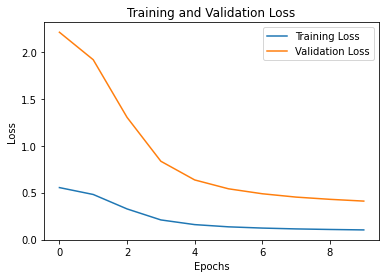

==================== RMS-PROP ====================
Epoch 0 - Training loss: 0.24894729041556518
Epoch 0 - Validation loss: 0.15552048742315394
Epoch 1 - Training loss: 0.10507679026015103
Epoch 1 - Validation loss: 0.10164317428728843
Epoch 2 - Training loss: 0.0756928070235687
Epoch 2 - Validation loss: 0.1172240303551897
Epoch 3 - Training loss: 0.05694076312325584
Epoch 3 - Validation loss: 0.11685780032557692
Epoch 4 - Training loss: 0.04544883518782444
Epoch 4 - Validation loss: 0.1181370047223878
Epoch 5 - Training loss: 0.037986878760935115
Epoch 5 - Validation loss: 0.12048838805206655
Epoch 6 - Training loss: 0.03422871268961656
Epoch 6 - Validation loss: 0.12135988694276324
Epoch 7 - Training loss: 0.028515184629746122
Epoch 7 - Validation loss: 0.12448540701347581
Epoch 8 - Training loss: 0.026497212629956874
Epoch 8 - Validation loss: 0.1640453343508388
Epoch 9 - Training loss: 0.022554801540424402
Epoch 9 - Validation loss: 0.143490045603638
Test loss: 9
RMS-PROP Model Acc

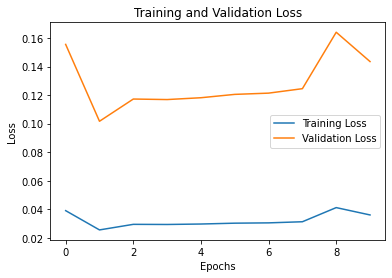

==================== ADAM ====================
Epoch 0 - Training loss: 0.25207638007650773
Epoch 0 - Validation loss: 0.14921269352805425
Epoch 1 - Training loss: 0.10781708990720411
Epoch 1 - Validation loss: 0.10150641873677044
Epoch 2 - Training loss: 0.07249015621157984
Epoch 2 - Validation loss: 0.10244193191372572
Epoch 3 - Training loss: 0.05705075720573465
Epoch 3 - Validation loss: 0.09571207810733269
Epoch 4 - Training loss: 0.0462437055001501
Epoch 4 - Validation loss: 0.08765769194677829
Epoch 5 - Training loss: 0.037379738905156654
Epoch 5 - Validation loss: 0.10058318620220699
Epoch 6 - Training loss: 0.03837373198666804
Epoch 6 - Validation loss: 0.11661495439500172
Epoch 7 - Training loss: 0.0313251192880319
Epoch 7 - Validation loss: 0.11245181539600302
Epoch 8 - Training loss: 0.02729989377774958
Epoch 8 - Validation loss: 0.10519901870499412
Epoch 9 - Training loss: 0.026533289975331477
Epoch 9 - Validation loss: 0.12036945429414853
Test loss: 9
ADAM Model Accuracy 

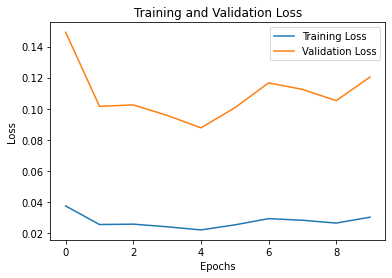

In [15]:
learning_rate = 0.003
l2_regularization_value=0.001
metrics = {'accuracy': [], 
        'f1 score': [],
        'precision': [],
        'recall': []}
model = SimpleMLP()
optimizers={
    'SGD':torch.optim.SGD(model.parameters(), lr=learning_rate),
    'SGD_Momentum':torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9),
    'SGD-L2':torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=l2_regularization_value),
    'RMS-PROP': torch.optim.RMSprop(model.parameters(), lr=learning_rate),
    'ADAM':torch.optim.Adam(model.parameters(), lr=learning_rate)
}

for optimizer_name, optimizer in optimizers.items():  
    model = SimpleMLP()
    optimizers={
        'SGD':torch.optim.SGD(model.parameters(), lr=learning_rate),
        'SGD_Momentum':torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9),
        'SGD-L2':torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=l2_regularization_value),
        'RMS-PROP': torch.optim.RMSprop(model.parameters(), lr=learning_rate),
        'ADAM':torch.optim.Adam(model.parameters(), lr=learning_rate)
    }
    optimizer = optimizers[optimizer_name]
    print("="*20,optimizer_name,"="*20)
    lossFunc = nn.CrossEntropyLoss()
    time0 = time()
    epochs = 10

    train_loss = []
    val_loss = []
    for e in range(epochs):
        running_loss = 0
        for images, labels in train_loader_mini_batch:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
            # Training pass
            optimizer.zero_grad()
            output = model(images)
            loss = lossFunc(output, labels)
            #This is where the model learns by backpropagating
            loss.backward()
            
            #And optimizes its weights here
            optimizer.step()
            
            running_loss += loss.item()
        else:
            print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader_mini_batch)))
        model.eval()
        with torch.no_grad():
            running_loss = 0
            for (data, target) in val_loader_mini_batch:
                # do things
                output = model(data)
                running_loss += lossFunc(output, target).item()
                pred = output.argmax(dim=1, keepdim=True)
                #correct += pred.eq(target.view_as(pred)).sum().item()

            print("Epoch {} - Validation loss: {}".format(e, running_loss/len(val_loader_mini_batch)))
        train_loss.append(running_loss/len(train_loader_mini_batch))
        val_loss.append(running_loss/len(val_loader_mini_batch))
    #print("\nTraining Time (in minutes) =",(time()-time0)/60)
    
    correct_count, all_count = 0, 0
    test_loss = 0
    for images,labels in testloader_minibatch:
      #for i in range(len(labels)):
        img = images.view(images.shape[0],-1)
        with torch.no_grad():
            logps = model(img)
        test_loss += lossFunc(logps, labels).item()
        ps = torch.exp(logps)

        #probab = list(ps.numpy()[0])
        #pred_label = probab.index(max(probab))
        pred_label=[]
        for i in range(ps.numpy().shape[0]):
          pred_label.append(np.argmax(ps.numpy()[i]))
        true_label = labels.numpy()
        correct_count += np.where(true_label == pred_label)[0].shape[0]     
        all_count += len(pred_label)
    print("Test loss: {}".format(e, test_loss/len(testloader_minibatch)))
    print(optimizer_name,"Model Accuracy =", (correct_count/all_count))

    acc, f1, precision, recall = evaluate_model(model, testloader_minibatch)
    
    metrics['accuracy'].append(acc)
    metrics['f1 score'].append(f1)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)

    epochs = range(0, epochs)
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    # Add in a title and axes labels
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    # Display the plot
    plt.legend(loc='best')
    plt.show()

### Step four: Run the SimpleMLP using different optimizers and plot train and test loss for each optimizer.
Explain the results.

Report final accuracy, F1 score and other relavant metrics in a tabular form on test and train datasets.

### Step five: Using SimpleMLP and Adam optimizer, train models using 2 different lr_schedulers.

> Indented block


Select 2 of **MultiplicativeLR**, **MultiStepLR**, **LinearLR** and **ExponentialLR**

Compare the results among different LR schedulers and the original model which didn't employ any LR scheduler. Compile results in a tabular form. Plot losses for each. Explain results.

==================== Exponential LR ====================
Epoch 0 - Training loss: 0.24803272756561637 
Epoch 0 - Validation loss: 0.13146018942302845
Epoch 1 - Training loss: 0.07722125992955019 
Epoch 1 - Validation loss: 0.09497121896376794
Epoch 2 - Training loss: 0.060144321262526015 
Epoch 2 - Validation loss: 0.09285411532433267
Epoch 3 - Training loss: 0.05822791867485891 
Epoch 3 - Validation loss: 0.0923877689353329
Epoch 4 - Training loss: 0.05797332139406353 
Epoch 4 - Validation loss: 0.09237269179628013
Epoch 5 - Training loss: 0.05794820330043634 
Epoch 5 - Validation loss: 0.0923630725963913
Epoch 6 - Training loss: 0.057945770404612025 
Epoch 6 - Validation loss: 0.09240953395380935
Epoch 7 - Training loss: 0.05794568714685738 
Epoch 7 - Validation loss: 0.09267551409318409
Epoch 8 - Training loss: 0.05794568637603273 
Epoch 8 - Validation loss: 0.09241071876331648
Epoch 9 - Training loss: 0.057945686660707 
Epoch 9 - Validation loss: 0.0922941832129467
Test loss: 9
ADA

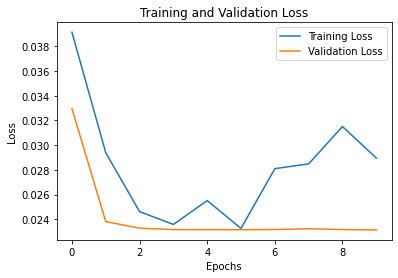

In [21]:
# code and analysis here
model = SimpleMLP()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler1 =torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)
# scheduler2 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

print("="*20,"Exponential LR","="*20)
lossFunc = nn.CrossEntropyLoss()
time0 = time()
epochs = 10

step_loss = []
exp_loss = []
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader_mini_batch:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = lossFunc(output, labels)
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {} ".format(e, running_loss/len(train_loader_mini_batch)))
    scheduler1.step()
    #scheduler2.step()

    model.eval()
    with torch.no_grad():
        running_loss = 0
        for (data, target) in val_loader_mini_batch:
            # do things
            output = model(data)
            running_loss += lossFunc(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            #correct += pred.eq(target.view_as(pred)).sum().item()

        print("Epoch {} - Validation loss: {}".format(e, running_loss/len(val_loader_mini_batch)))
    exp_loss.append(running_loss/len(train_loader_mini_batch))
#print("\nTraining Time (in minutes) =",(time()-time0)/60)

correct_count, all_count = 0, 0
test_loss = 0
for images,labels in testloader_minibatch:
  #for i in range(len(labels)):
    img = images.view(images.shape[0],-1)
    with torch.no_grad():
        logps = model(img)
    test_loss += lossFunc(logps, labels).item()
    ps = torch.exp(logps)

    #probab = list(ps.numpy()[0])
    #pred_label = probab.index(max(probab))
    pred_label=[]
    for i in range(ps.numpy().shape[0]):
      pred_label.append(np.argmax(ps.numpy()[i]))
    true_label = labels.numpy()
    correct_count += np.where(true_label == pred_label)[0].shape[0]     
    all_count += len(pred_label)
print("Test loss: {}".format(e, test_loss/len(testloader_minibatch)))
print(optimizer_name,"Model Accuracy =", (correct_count/all_count))


model = SimpleMLP()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler2 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

print("="*20,"MultiStep LR","="*20)
lossFunc = nn.CrossEntropyLoss()
time0 = time()
epochs = 10

for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader_mini_batch:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = lossFunc(output, labels)
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {} ".format(e, running_loss/len(train_loader_mini_batch)))
    scheduler2.step()
    #scheduler2.step()

    model.eval()
    with torch.no_grad():
        running_loss = 0
        for (data, target) in val_loader_mini_batch:
            # do things
            output = model(data)
            running_loss += lossFunc(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            #correct += pred.eq(target.view_as(pred)).sum().item()

        print("Epoch {} - Validation loss: {}".format(e, running_loss/len(val_loader_mini_batch)))
    step_loss.append(running_loss/len(train_loader_mini_batch))
#print("\nTraining Time (in minutes) =",(time()-time0)/60)

correct_count, all_count = 0, 0
test_loss = 0
for images,labels in testloader_minibatch:
  #for i in range(len(labels)):
    img = images.view(images.shape[0],-1)
    with torch.no_grad():
        logps = model(img)
    test_loss += lossFunc(logps, labels).item()
    ps = torch.exp(logps)

    #probab = list(ps.numpy()[0])
    #pred_label = probab.index(max(probab))
    pred_label=[]
    for i in range(ps.numpy().shape[0]):
      pred_label.append(np.argmax(ps.numpy()[i]))
    true_label = labels.numpy()
    correct_count += np.where(true_label == pred_label)[0].shape[0]     
    all_count += len(pred_label)
print("Test loss: {}".format(e, test_loss/len(testloader_minibatch)))
print(optimizer_name,"Model Accuracy =", (correct_count/all_count))


epochs = range(0, epochs)
plt.plot(epochs, step_loss, label='Training Loss')
plt.plot(epochs, exp_loss, label='Validation Loss')
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Display the plot
plt.legend(loc='best')
plt.show()

### Step six: Define 3 models with following changes:
1. Add BatchNorm
2. Add Dropout
3. Add BatchNorm and Dropout

In [24]:
# code here
class SimpleMLP_BatchNorm(nn.Module):
    def __init__(self):
        super(SimpleMLP_BatchNorm,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Linear(64, 10),
        )
        # code here
    def forward(self,x):
        # code here
        x = self.flatten(x)
        output = self.linear_relu_stack(x)
        return output

class SimpleMLP_Dropout(nn.Module):
    def __init__(self):
        super(SimpleMLP_Dropout,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(p=0.30),
            nn.Linear(64, 10),
        )
        # code here
    def forward(self,x):
        # code here
        x = self.flatten(x)
        output = self.linear_relu_stack(x)
        return output

class SimpleMLP_BatchNorm_Dropout(nn.Module):
    def __init__(self):
        super(SimpleMLP_BatchNorm_Dropout,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p=0.30),
            nn.Linear(64, 10),
        )
        # code here
    def forward(self,x):
        # code here
        x = self.flatten(x)
        output = self.linear_relu_stack(x)
        return output

### Step seven: Train the above models and compare with SimpleMLP.

Use your choice of optimizer, use no lr_scheduler so as to re-use the previous results.

Perform analysis. You've got the drill by now.

==================== BatchNorm ====================
Epoch 0 - Training loss: 0.21253349139913916 
Epoch 0 - Validation loss: 0.11926212407985425
Epoch 1 - Training loss: 0.1106273642728726 
Epoch 1 - Validation loss: 0.09984453431915175
Epoch 2 - Training loss: 0.07357146591553465 
Epoch 2 - Validation loss: 0.10620937133183148
Epoch 3 - Training loss: 0.056129398602837076 
Epoch 3 - Validation loss: 0.10353531143838599
Epoch 4 - Training loss: 0.04728604740467078 
Epoch 4 - Validation loss: 0.09153557263507923
Test loss: 4
ADAM Model Accuracy = 0.9781
==================== Dropout ====================
Epoch 0 - Training loss: 0.3284461463044087 
Epoch 0 - Validation loss: 0.1399322448773904
Epoch 1 - Training loss: 0.10805769492313266 
Epoch 1 - Validation loss: 0.10751777515806099
Epoch 2 - Training loss: 0.07429401709108303 
Epoch 2 - Validation loss: 0.11048994400164489
Epoch 3 - Training loss: 0.057454055729322134 
Epoch 3 - Validation loss: 0.1047528627256744
Epoch 4 - Training lo

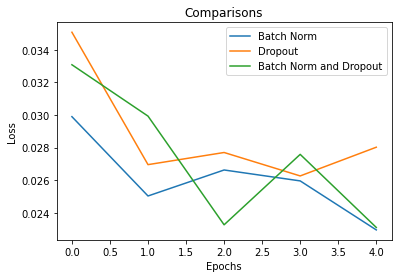

In [26]:
# code here
model = SimpleMLP_BatchNorm()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# scheduler2 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

print("="*20,"BatchNorm","="*20)
lossFunc = nn.CrossEntropyLoss()
time0 = time()
epochs = 5

batchnorm_loss = []
both_loss = []
dropout_loss=[]
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader_mini_batch:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = lossFunc(output, labels)
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {} ".format(e, running_loss/len(train_loader_mini_batch)))
    model.eval()
    with torch.no_grad():
        running_loss = 0
        for (data, target) in val_loader_mini_batch:
            # do things
            output = model(data)
            running_loss += lossFunc(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            #correct += pred.eq(target.view_as(pred)).sum().item()

        print("Epoch {} - Validation loss: {}".format(e, running_loss/len(val_loader_mini_batch)))
    batchnorm_loss.append(running_loss/len(train_loader_mini_batch))
#print("\nTraining Time (in minutes) =",(time()-time0)/60)

correct_count, all_count = 0, 0
test_loss = 0
for images,labels in testloader_minibatch:
  #for i in range(len(labels)):
    img = images.view(images.shape[0],-1)
    with torch.no_grad():
        logps = model(img)
    test_loss += lossFunc(logps, labels).item()
    ps = torch.exp(logps)

    #probab = list(ps.numpy()[0])
    #pred_label = probab.index(max(probab))
    pred_label=[]
    for i in range(ps.numpy().shape[0]):
      pred_label.append(np.argmax(ps.numpy()[i]))
    true_label = labels.numpy()
    correct_count += np.where(true_label == pred_label)[0].shape[0]     
    all_count += len(pred_label)
print("Test loss: {}".format(e, test_loss/len(testloader_minibatch)))
print(optimizer_name,"Model Accuracy =", (correct_count/all_count))





# code here
model = SimpleMLP_Dropout()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# scheduler2 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

print("="*20,"Dropout","="*20)
lossFunc = nn.CrossEntropyLoss()
time0 = time()
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader_mini_batch:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = lossFunc(output, labels)
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {} ".format(e, running_loss/len(train_loader_mini_batch)))
    model.eval()
    with torch.no_grad():
        running_loss = 0
        for (data, target) in val_loader_mini_batch:
            # do things
            output = model(data)
            running_loss += lossFunc(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            #correct += pred.eq(target.view_as(pred)).sum().item()

        print("Epoch {} - Validation loss: {}".format(e, running_loss/len(val_loader_mini_batch)))
    dropout_loss.append(running_loss/len(train_loader_mini_batch))
#print("\nTraining Time (in minutes) =",(time()-time0)/60)

correct_count, all_count = 0, 0
test_loss = 0
for images,labels in testloader_minibatch:
  #for i in range(len(labels)):
    img = images.view(images.shape[0],-1)
    with torch.no_grad():
        logps = model(img)
    test_loss += lossFunc(logps, labels).item()
    ps = torch.exp(logps)

    #probab = list(ps.numpy()[0])
    #pred_label = probab.index(max(probab))
    pred_label=[]
    for i in range(ps.numpy().shape[0]):
      pred_label.append(np.argmax(ps.numpy()[i]))
    true_label = labels.numpy()
    correct_count += np.where(true_label == pred_label)[0].shape[0]     
    all_count += len(pred_label)
print("Test loss: {}".format(e, test_loss/len(testloader_minibatch)))
print(optimizer_name,"Model Accuracy =", (correct_count/all_count))




# code here
model = SimpleMLP_BatchNorm_Dropout()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# scheduler2 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

print("="*20,"BatchNorm-Dropout","="*20)
lossFunc = nn.CrossEntropyLoss()
time0 = time()

for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader_mini_batch:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = lossFunc(output, labels)
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {} ".format(e, running_loss/len(train_loader_mini_batch)))
    model.eval()
    with torch.no_grad():
        running_loss = 0
        for (data, target) in val_loader_mini_batch:
            # do things
            output = model(data)
            running_loss += lossFunc(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            #correct += pred.eq(target.view_as(pred)).sum().item()

        print("Epoch {} - Validation loss: {}".format(e, running_loss/len(val_loader_mini_batch)))
    both_loss.append(running_loss/len(train_loader_mini_batch))
#print("\nTraining Time (in minutes) =",(time()-time0)/60)

correct_count, all_count = 0, 0
test_loss = 0
for images,labels in testloader_minibatch:
  #for i in range(len(labels)):
    img = images.view(images.shape[0],-1)
    with torch.no_grad():
        logps = model(img)
    test_loss += lossFunc(logps, labels).item()
    ps = torch.exp(logps)

    #probab = list(ps.numpy()[0])
    #pred_label = probab.index(max(probab))
    pred_label=[]
    for i in range(ps.numpy().shape[0]):
      pred_label.append(np.argmax(ps.numpy()[i]))
    true_label = labels.numpy()
    correct_count += np.where(true_label == pred_label)[0].shape[0]     
    all_count += len(pred_label)
print("Test loss: {}".format(e, test_loss/len(testloader_minibatch)))
print(optimizer_name,"Model Accuracy =", (correct_count/all_count))

epochs = range(0, epochs)
plt.plot(epochs, batchnorm_loss, label='Batch Norm')
plt.plot(epochs, dropout_loss, label='Dropout')
plt.plot(epochs, both_loss, label='Batch Norm and Dropout')

# Add in a title and axes labels
plt.title('Comparisons')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Display the plot
plt.legend(loc='best')
plt.show()

### Step eight: Mini-batch vs Stocastic
Now that you might have a clear winner in your mind regarding which model and settings perform the best, train it on mini-batch and stocastic and compare time taken, loss curve, accuracy etc.

Perform an analysis like never before!

==================== Minibatch ====================
Epoch 0 - Training loss: 0.2568576496193806 
Epoch 0 - Validation loss: 0.14943797955230037
Epoch 1 - Training loss: 0.10565111380815506 
Epoch 1 - Validation loss: 0.09932177527460884
Epoch 2 - Training loss: 0.07258413508969049 
Epoch 2 - Validation loss: 0.09532300887896897
Epoch 3 - Training loss: 0.05381352504560103 
Epoch 3 - Validation loss: 0.09968503223028669
Epoch 4 - Training loss: 0.0470942747114071 
Epoch 4 - Validation loss: 0.114430488716375
Test loss: 4
ADAM Model Accuracy = 0.9713
==================== Stochastic ====================
Epoch 0 - Training loss: 0.3881633271499093 
Epoch 1 - Training loss: 0.3494723873630354 
Epoch 2 - Training loss: 0.3461433860365089 
Epoch 3 - Training loss: 0.4010192781624092 
Epoch 4 - Training loss: 0.47340543094715287 
Test loss: 4
ADAM Model Accuracy = 0.1648


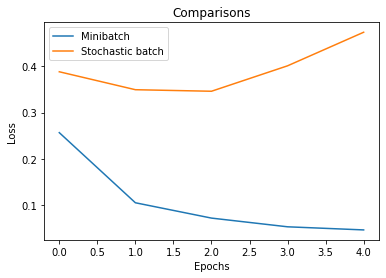

In [28]:
# code here
# code here
model = SimpleMLP()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# scheduler2 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

print("="*20,"Minibatch","="*20)
lossFunc = nn.CrossEntropyLoss()
time0 = time()
epochs = 5

mini_loss = []
stoc_loss=[]
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader_mini_batch:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = lossFunc(output, labels)
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {} ".format(e, running_loss/len(train_loader_mini_batch)))
    mini_loss.append(running_loss/len(train_loader_mini_batch))
    model.eval()
    with torch.no_grad():
        running_loss = 0
        for (data, target) in val_loader_mini_batch:
            # do things
            output = model(data)
            running_loss += lossFunc(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            #correct += pred.eq(target.view_as(pred)).sum().item()

        print("Epoch {} - Validation loss: {}".format(e, running_loss/len(val_loader_mini_batch)))
#print("\nTraining Time (in minutes) =",(time()-time0)/60)

correct_count, all_count = 0, 0
test_loss = 0
for images,labels in testloader_minibatch:
  #for i in range(len(labels)):
    img = images.view(images.shape[0],-1)
    with torch.no_grad():
        logps = model(img)
    test_loss += lossFunc(logps, labels).item()
    ps = torch.exp(logps)

    #probab = list(ps.numpy()[0])
    #pred_label = probab.index(max(probab))
    pred_label=[]
    for i in range(ps.numpy().shape[0]):
      pred_label.append(np.argmax(ps.numpy()[i]))
    true_label = labels.numpy()
    correct_count += np.where(true_label == pred_label)[0].shape[0]     
    all_count += len(pred_label)
print("Test loss: {}".format(e, test_loss/len(testloader_minibatch)))
print(optimizer_name,"Model Accuracy =", (correct_count/all_count))





# code here
model = SimpleMLP()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# scheduler2 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

print("="*20,"Stochastic","="*20)
lossFunc = nn.CrossEntropyLoss()
time0 = time()
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader_stochastic:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = lossFunc(output, labels)
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {} ".format(e, running_loss/len(trainloader_stochastic)))
    stoc_loss.append(running_loss/len(trainloader_stochastic))
#print("\nTraining Time (in minutes) =",(time()-time0)/60)

correct_count, all_count = 0, 0
test_loss = 0
for images,labels in testloader_stochastic:
  #for i in range(len(labels)):
    img = images.view(images.shape[0],-1)
    with torch.no_grad():
        logps = model(img)
    test_loss += lossFunc(logps, labels).item()
    ps = torch.exp(logps)

    #probab = list(ps.numpy()[0])
    #pred_label = probab.index(max(probab))
    pred_label=[]
    for i in range(ps.numpy().shape[0]):
      pred_label.append(np.argmax(ps.numpy()[i]))
    true_label = labels.numpy()
    correct_count += np.where(true_label == pred_label)[0].shape[0]     
    all_count += len(pred_label)
print("Test loss: {}".format(e, test_loss/len(testloader_stochastic)))
print(optimizer_name,"Model Accuracy =", (correct_count/all_count))


epochs = range(0, epochs)
plt.plot(epochs, mini_loss, label='Minibatch')
plt.plot(epochs, stoc_loss, label='Stochastic batch')

# Add in a title and axes labels
plt.title('Comparisons')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Display the plot
plt.legend(loc='best')
plt.show()


### And most importantly!!! What did we learn?
Discuss any and all learnings here. The discussions must be all-encompassing so that we know what did you learn. 

Please do not copy from your friend or copy-paste from the internet. We can see repetitions during evaluations.

The neural network can be fed in different ways, with mini-batch and stochastic training being two such methods. Stochastic training involves feeding the model one sample at a time during each training iteration, and updating the weights accordingly. This can be computationally expensive and slow.

On the other hand, mini-batch training involves feeding the model a subset of the dataset (e.g., 32 or 64 data points) at each iteration and updating the weights after each batch. This is faster than stochastic training as more samples are used in each iteration. Additionally, this method provides more data to the network in each iteration, helping it learn better.

In our experiments, we observed that mini-batch training for 15 epochs with a batch size of 64 took about 35 seconds, while training the stochastic model took almost double the time, around 6 minutes. The exact time taken depends largely on the CPU processor.